# Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 

In [1]:
#import libraries for data analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Variable  ----   Description
###### Age       ----    Age in years
###### Sex       ----    1 = male; 0 = female
###### cp|       ----   Chest pain type
###### trestbps  ----   Resting blood pressure (in mm Hg on admission to the hospital)
###### chol      ----   Serum cholesterol in mg/dl
###### fbs       ----   Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
###### restecg   ----   Resting electrocardiographic results
###### thalach   ----   Maximum heart rate achieved
###### exang     ----   Exercise induced angina (1 = yes; 0 = no)
###### oldpeak   ----   ST depression induced by exercise relative to rest
###### slope     ----   Slope of the peak exercise ST segment
###### ca        ----   Number of major vessels (0-3) colored by fluoroscopy
###### thal      ----   3 = normal; 6 = fixed defect; 7 = reversible defect
###### target.   ----- 1=No CVD 0=CVD


In [2]:
# load data 
data = pd.read_excel('1645792390_cep1_dataset.xlsx')

## Task1: Preliminary analysis:

#### a.Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [3]:
#shape of the data 
data.shape

(303, 14)

In [4]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Observation: Data is numerical.

In [6]:
# check for nulls
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### observation: No nulls

In [7]:
#check for duplicates 
duplicateRows = data[data.duplicated()]

In [8]:
duplicateRows 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


##### obeservation: one duplicate row

#### b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [26]:
### there are no nulls as seen above and only 1 duplicate row. Lets drop the duplicate.

In [9]:
#drop the duplicates and overwrite data dataset
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(302, 14)

## Task2: Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

#### a.Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
#mean

In [257]:
data.target.mean()

0.543046357615894

In [13]:
data.target.median()

1.0

In [14]:
data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [15]:
#to get the stats in percentage 
data.target.value_counts(normalize=True)

1    0.543046
0    0.456954
Name: target, dtype: float64

In [16]:
# So 54.3% have No CVD and 45.6% does have CVD. (Considering 1 means NO CVD and 0 means Yes CVD)

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

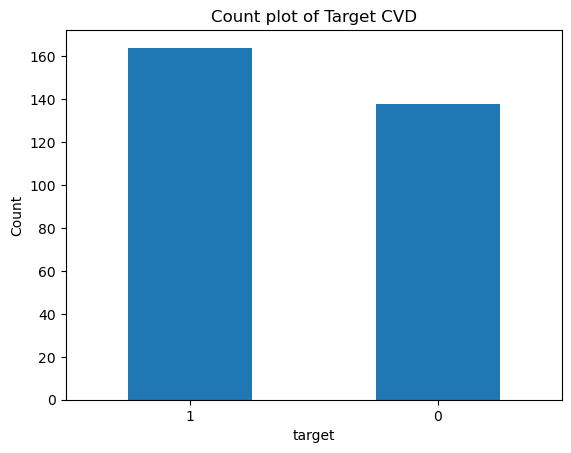

In [17]:
# plot a distribution of target
data.target.value_counts().plot(kind='bar')
plt.title('Count plot of Target CVD')
plt.ylabel('Count')
plt.xlabel('target')
plt.xticks(rotation=0)

In [18]:
#Skeweness
data.target.skew()

-0.17369101189529737

In [19]:
#skewness of the features in data set 
data.skew()

age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalach    -0.532671
exang       0.737281
oldpeak     1.266173
slope      -0.503247
ca          1.295738
thal       -0.481232
target     -0.173691
dtype: float64

In [264]:
# As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. 
# If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. 
# If skewness is between -0.5 and 0.5, the distribution is approximately symmetric
# Based on this we can see that the following are considerably skewed 
### cholestrol
### ca
### oldpeak
### fbs
# all other features are moderately skewed or not much skewed

In [265]:
# there are many factors that increases chances of having CVD. The following can be few of them from our feature list
# age
# sex
# blood sugar
# cholestrol
# lest see their relation with the target

In [33]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.088788,-0.068094,0.288863,0.191797,0.121857,-0.107477,-0.398770,0.096838,0.204556,-0.161770,0.306819,0.060456,-0.226768
sex,-0.088788,1.000000,-0.047091,-0.062571,-0.177785,0.044156,-0.065573,-0.044392,0.140677,0.101059,-0.036287,0.110067,0.218135,-0.280538
cp,-0.068094,-0.047091,1.000000,0.049809,-0.099848,0.097609,0.045062,0.292435,-0.391579,-0.148604,0.119296,-0.193457,-0.164733,0.430339
trestbps,0.288863,-0.062571,0.049809,1.000000,0.154841,0.177124,-0.118896,-0.046673,0.066482,0.196479,-0.125178,0.097227,0.066631,-0.143798
chol,0.191797,-0.177785,-0.099848,0.154841,1.000000,0.021362,-0.136175,-0.015640,0.083856,0.043089,0.014555,0.108600,0.079237,-0.107258
fbs,0.121857,0.044156,0.097609,0.177124,0.021362,1.000000,-0.084641,-0.006539,0.023784,0.005186,-0.059610,0.144105,-0.031270,-0.025594
restecg,-0.107477,-0.065573,0.045062,-0.118896,-0.136175,-0.084641,1.000000,0.042815,-0.071309,-0.054763,0.088460,-0.085709,-0.006768,0.138354
thalach,-0.398770,-0.044392,0.292435,-0.046673,-0.015640,-0.006539,0.042815,1.000000,-0.376789,-0.343179,0.386134,-0.227499,-0.096843,0.419296
exang,0.096838,0.140677,-0.391579,0.066482,0.083856,0.023784,-0.071309,-0.376789,1.000000,0.288225,-0.257992,0.123924,0.209029,-0.434432
oldpeak,0.204556,0.101059,-0.148604,0.196479,0.043089,0.005186,-0.054763,-0.343179,0.288225,1.000000,-0.575904,0.237995,0.207816,-0.431378


####  notes: Age does not have high corelation when compared to cholestrol CP, thalach, exang , oldpeak ca. 

<AxesSubplot:ylabel='Frequency'>

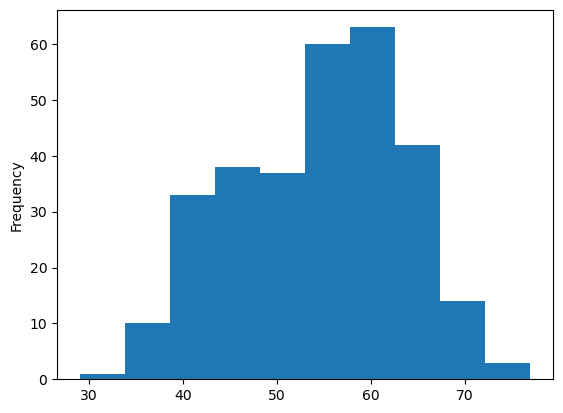

In [34]:
# age distribution 
data.age.plot(kind='hist')

In [22]:
data.age.skew()

-0.2037432795959691

<AxesSubplot:ylabel='Frequency'>

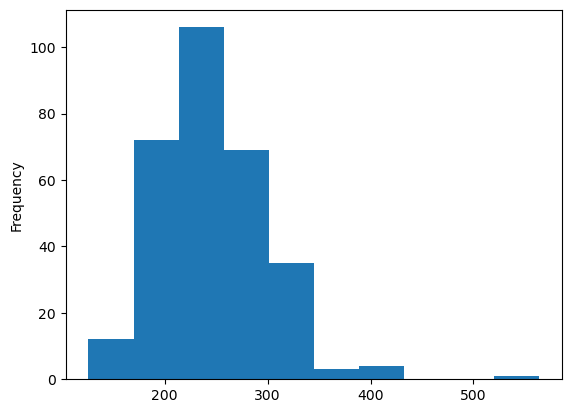

In [23]:
# cholestrol 
data.chol.plot(kind='hist')

In [35]:
# looks like few outliers exist above 500 
data[data.chol>500].value_counts()

Series([], dtype: int64)

In [36]:
# only 1 outlier that i smaking it skewed. Lets remove that from data set
data = data[data.chol<500]

In [37]:
data.shape

(301, 14)

<AxesSubplot:ylabel='Frequency'>

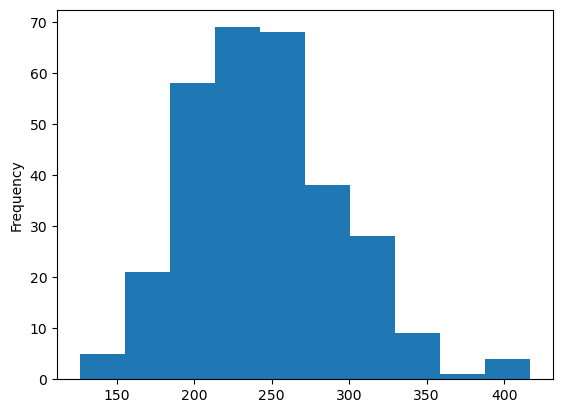

In [38]:
# cholestrol 
data.chol.plot(kind='hist')

In [39]:
# better but it is skewed.
data.chol.skew()

0.523645918715455

<AxesSubplot:ylabel='Frequency'>

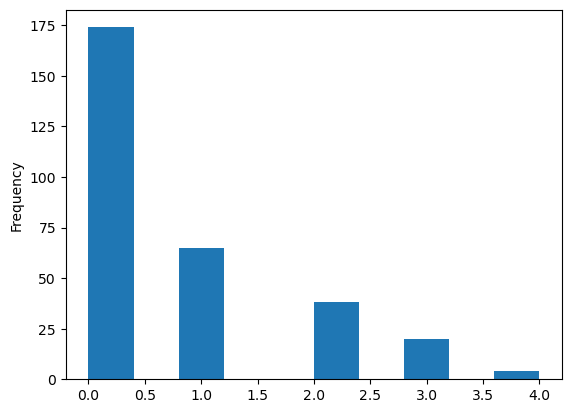

In [40]:
# skeweness of ca
data.ca.plot(kind='hist')

In [41]:
data.ca.value_counts()

0    174
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [ ]:
data[data.ca>3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


<AxesSubplot:ylabel='Frequency'>

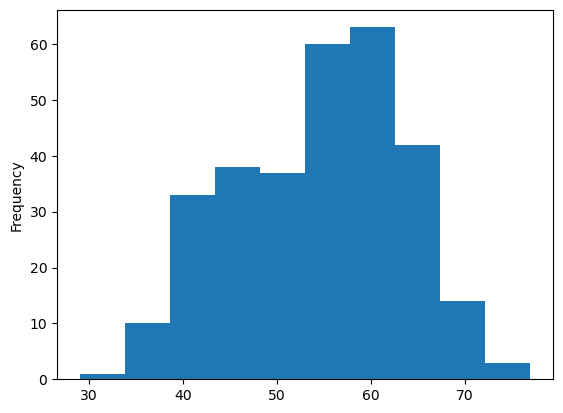

In [42]:
data.age.plot(kind='hist')

In [43]:
data.age.skew()

-0.20047979020213513

In [44]:
data[data.age<35].value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
29   1    1   130       204   0    0        202      0      0.0      2      0   2     1         1
34   0    1   118       210   0    1        192      0      0.7      2      0   2     1         1
     1    3   118       182   0    0        174      0      0.0      2      0   2     1         1
dtype: int64

#### b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [45]:
# there are no qualitative data as such but soem ordinal and nominal data exists
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


In [46]:
# sex is nominal data 
data.sex.value_counts() # 1 male 0 female

1    206
0     95
Name: sex, dtype: int64

In [47]:
#cp - chest pain type is ordinal data

In [284]:
data.cp.value_counts()

0    143
2     85
1     50
3     23
Name: cp, dtype: int64

In [48]:
#exang is nominal data
data.exang.value_counts()

0    202
1     99
Name: exang, dtype: int64

In [286]:
#ca is nominal data
data.ca.value_counts()

0    174
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [49]:
data.thal.value_counts()

2    165
3    116
1     18
0      2
Name: thal, dtype: int64

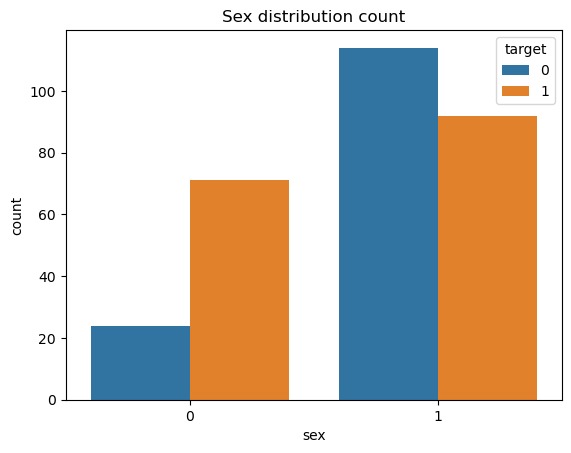

In [50]:
# lest plot count plots on these variables
#plot sex
sns.countplot(x='sex',hue='target', data= data).set(title='Sex distribution count')
plt.show()

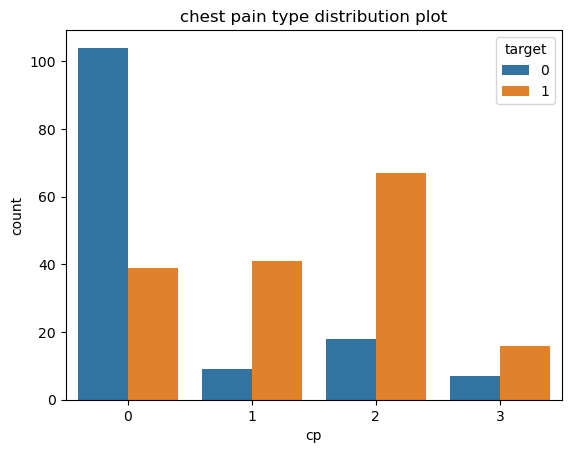

In [51]:
#plot chest pain type
sns.countplot(x='cp',hue='target', data= data).set(title='chest pain type distribution plot')
plt.show()

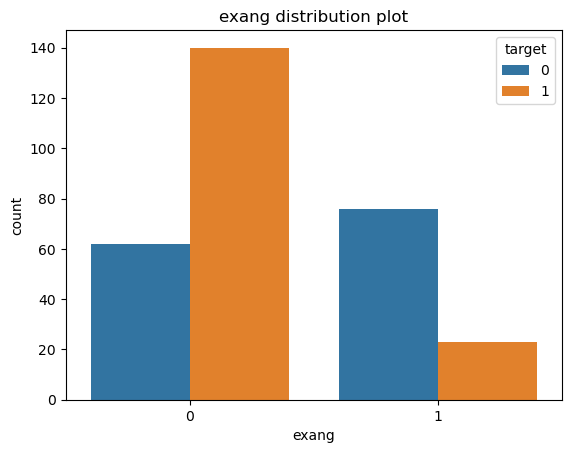

In [52]:
#exang distribution 
sns.countplot(x='exang',hue='target', data= data).set(title='exang distribution plot')
plt.show()


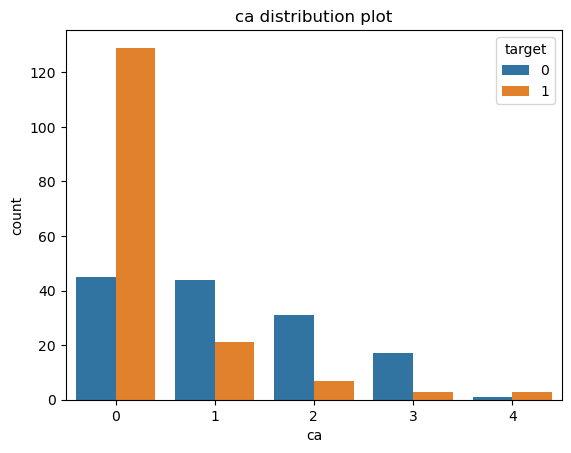

In [53]:
# plot ca
sns.countplot(x='ca',hue='target', data= data).set(title='ca distribution plot')
plt.show()


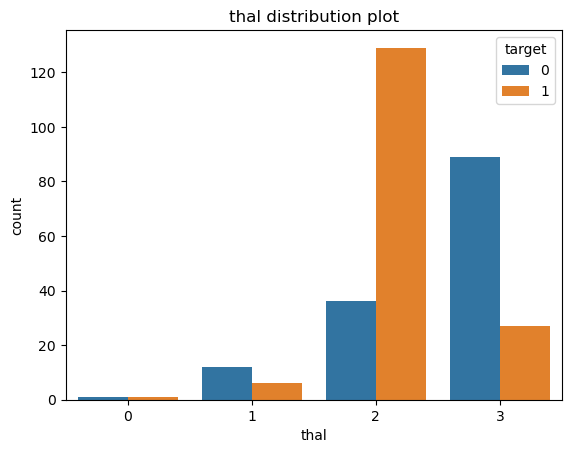

In [60]:
#thal distribution 
sns.countplot(x='thal',hue='target', data= data).set(title='thal distribution plot')
plt.show()


#### c. Study the occurrence of CVD across the Age category

In [61]:
#lest group ages into 10s so that it will make sense to check the prone of CVD in the age group.
def categorize_age(age):
    if(0<=age<=2):
        return 'infant'
    elif 2<age<=5:
        return 'toddler'
    elif 5<age<=12:
        return 'kid'
    elif 12 < age <= 19:
        return 'Adolescent'
    elif 19 < age <= 24:
        return "Young Adult"
    elif 24 < age <= 44:
        return "Adult"
    elif 44 < age <= 60:
        return "Middle Aged"
    elif 60 < age:
        return "Aged"


In [62]:
def categorize_age_tees(age):
    if 0 < age <= 10:
        return "10s"
    elif 10 < age <= 30:
        return "20s"
    elif 20 < age <= 30:
        return "30s"
    elif 30 < age <= 40:
        return "40s"
    elif 40 < age <= 50:
        return "50s"
    elif 50 < age <= 60:
        return "60s"
    elif 60 < age <= 70:
        return "70+"

In [65]:
data['age_cat'] = data['age'].apply(lambda x: categorize_age(x))
data['age_grp'] = data['age'].apply(lambda x: categorize_age_tees(x))
data.drop('age_tees',axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_cat,age_grp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Aged,70+
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult,40s
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult,50s
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Aged,60s
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Aged,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Middle Aged,60s
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Middle Aged,50s
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Aged,70+
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Middle Aged,60s


In [66]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_cat,age_tees,age_grp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Aged,70+,70+
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult,40s,40s
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult,50s,50s
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Aged,60s,60s
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Aged,60s,60s


<AxesSubplot:xlabel='age_grp', ylabel='count'>

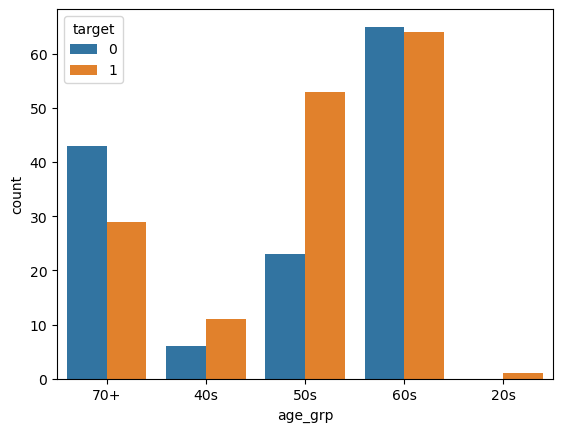

In [67]:
#plot the groups
sns.countplot(x='age_grp',hue='target', data=data)

<AxesSubplot:xlabel='age_cat', ylabel='count'>

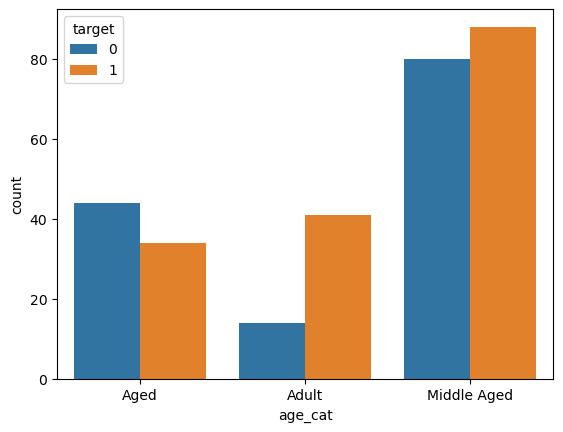

In [68]:
#plot the groups
sns.countplot(x='age_cat',hue='target', data=data)

In [72]:
print('number of Middle Age group  that had CVD' , data.query("age_cat == 'Middle Aged' & target == 0 ").shape[0])
print('number of Middle Age group  that does not have  CVD' , data.query("age_cat == 'Middle Aged' & target == 1 ").shape[0])
print('Rate of Middle Age group  that does have  CVD' , data.query("age_cat == 'Middle Aged' & target == 0 ").shape[0]/data.query("age_cat == 'Middle Aged'").shape[0])


print('number of Adult group that had CVD' , data.query("age_cat == 'Adult' & target == 0 ").shape[0])
print('number of Adult group that does not have CVD' , data.query("age_cat == 'Adult' & target == 1 ").shape[0])
print('Rate of Adult group that does  have CVD' , data.query("age_cat == 'Adult' & target == 0 ").shape[0]/data.query("age_cat == 'Adult' ").shape[0])


print('number of Old Age group that had CVD' , data.query("age_cat == 'Aged' & target == 0 ").shape[0])
print('number of Old Age group that does not CVD' , data.query("age_cat == 'Aged' & target == 1 ").shape[0])
print('Rate of Old Age group that does CVD' , data.query("age_cat == 'Aged' & target == 0 ").shape[0]/data.query("age_cat == 'Aged'").shape[0])

number of Middle Age group  that had CVD 80
number of Middle Age group  that does not have  CVD 88
Rate of Middle Age group  that does have  CVD 0.47619047619047616
number of Adult group that had CVD 14
number of Adult group that does not have CVD 41
Rate of Adult group that does  have CVD 0.2545454545454545
number of Old Age group that had CVD 44
number of Old Age group that does not CVD 34
Rate of Old Age group that does CVD 0.5641025641025641


#### the graphs shows that middle aged group is more affected population.However with in the group population teh percentage of having CVD with not hvaing CVD is more in Aged group


<AxesSubplot:xlabel='age', ylabel='count'>

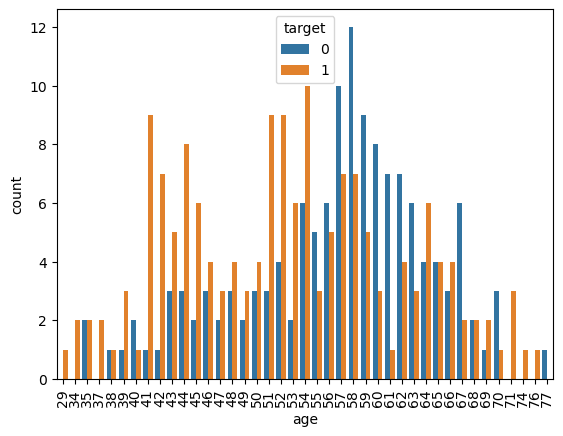

In [73]:
#plot the groups
plt.xticks(rotation=90)
sns.countplot(x='age', hue='target' , data=data)

/Users/shyam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'age distribution of Heart Diseased Patients\n')

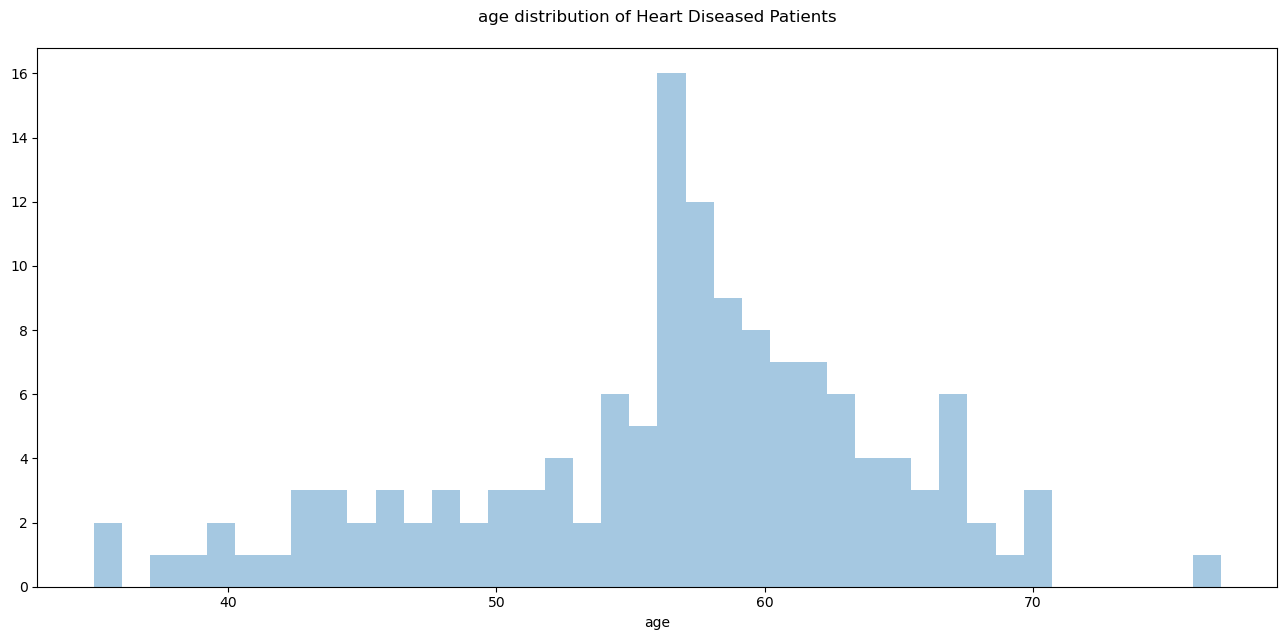

In [74]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['age'],kde=False,bins=40)
plt.title('age distribution of Heart Diseased Patients\n')

In [322]:
## you can see that it is less common below age 40. and very high possibility in middle aged group between 44-64.

#### d: Study the composition of all patients with respect to the Sex category

In [75]:
# sex is nominal data 
data.sex.value_counts() # 1 male 0 female

1    206
0     95
Name: sex, dtype: int64

In [76]:
data2 = data.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
data2['sex'] = data2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
data2['target'] = data2['target'].apply(chng2)

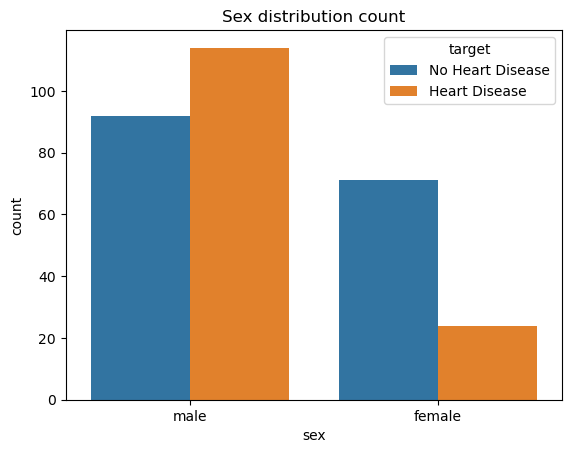

In [77]:
# lest plot count plots on these variables
#plot sex
sns.countplot(x='sex',hue='target', data= data2).set(title='Sex distribution count')
plt.show()

In [79]:
print('number of Males that had CVD' , data.query("sex == 1 & target == 0 ").shape[0])
print('number of Females group that had CVD' , data.query("sex == 0 & target == 0 ").shape[0])


number of Males that had CVD 114
number of Females group that had CVD 24


It is observed that Men are prone to Heart diseases.

#### e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

<AxesSubplot:xlabel='trestbps', ylabel='count'>

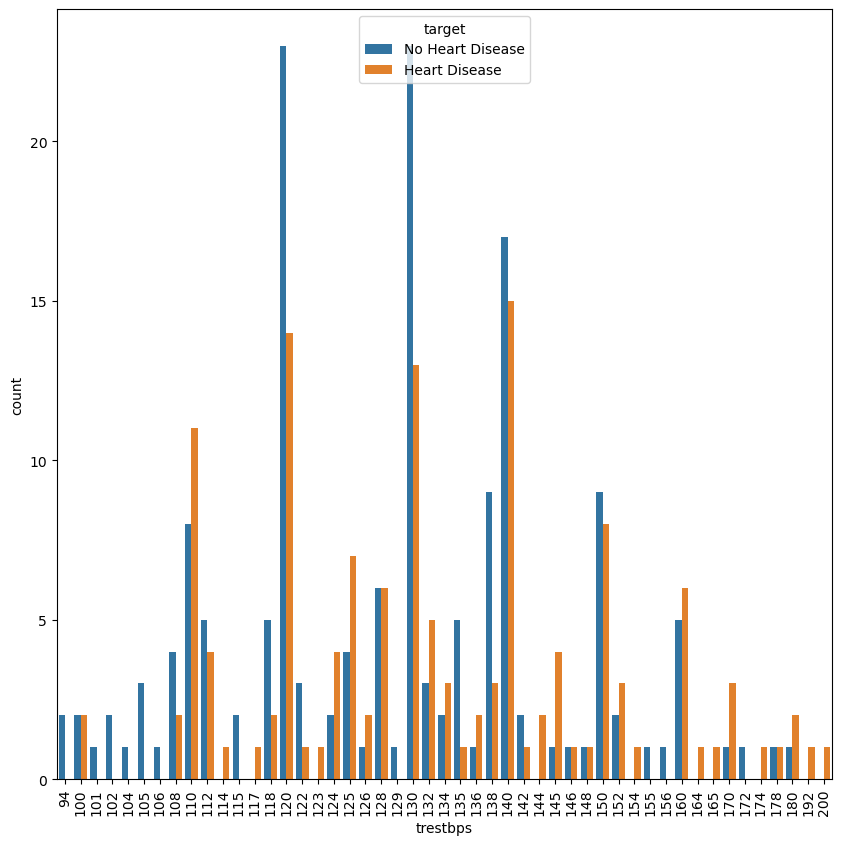

In [80]:
#plot the groups
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(x='trestbps',hue='target', data=data2)

In [243]:
# most fo the CVD occurrign for the trestbps between 110 and 160 

In [81]:
# lets see the correlation between trestbps and the target 
data['trestbps'].corr(data['target'])

-0.14379819351502326

In [313]:
# it is not highly related with the target.

Text(0, 0.5, 'target')

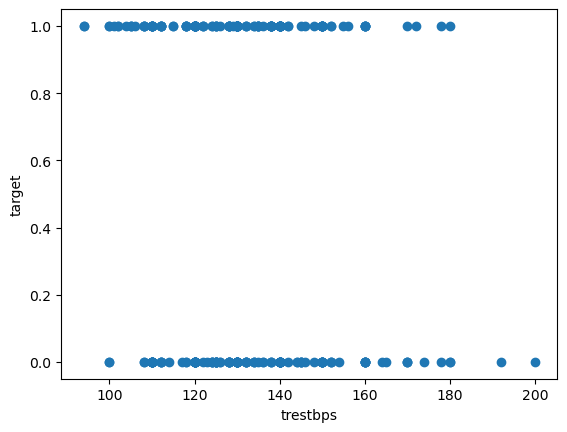

In [82]:
plt.scatter(data['trestbps'], data['target'])
plt.xlabel('trestbps')
plt.ylabel('target')

#### f.Describe the relationship between cholesterol levels and a target variable

/Users/shyam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

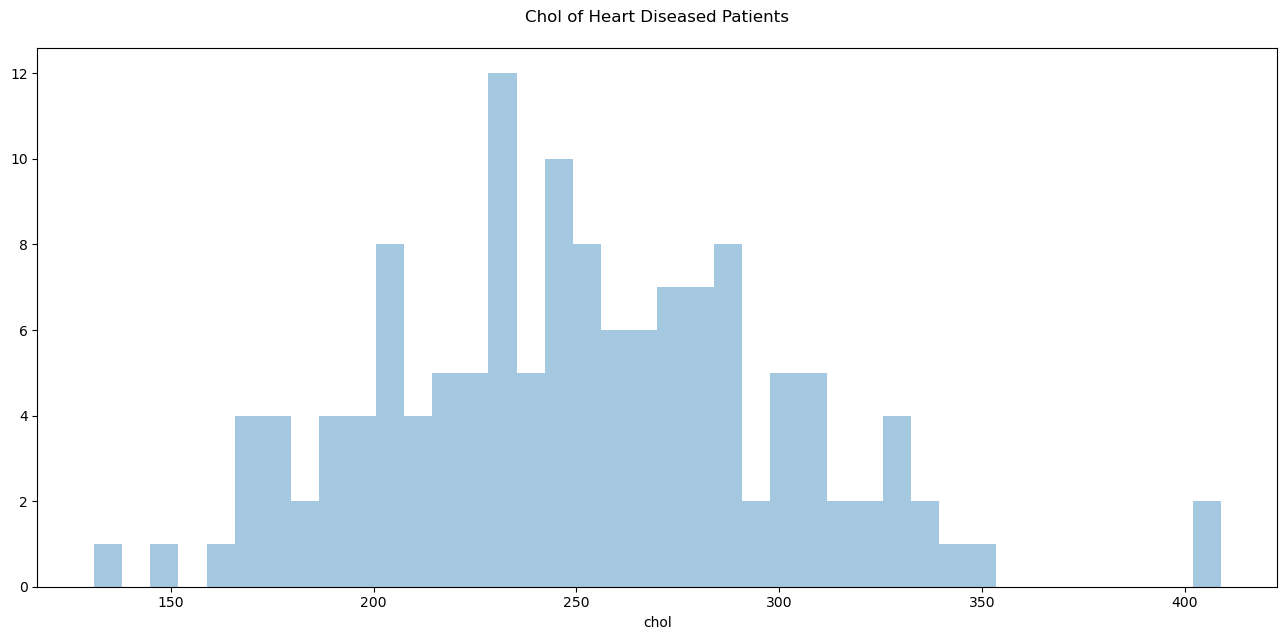

In [83]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

In [323]:
# we can see that overall high risk of heart disease any cholestrol values above 200s. 

### g.State what relationship exists between peak exercising and the occurrence of a heart attack

Text(0.5, 1.0, 'peak exercise relationship with  Heart Diseased Patients\n')

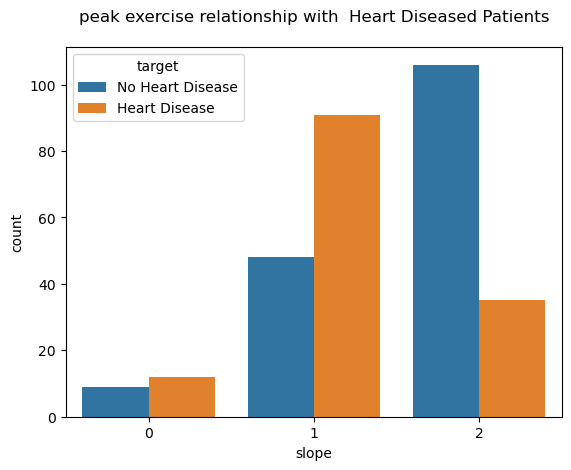

In [84]:
# peak exercising var is slope
sns.countplot(data= data2, x='slope',hue='target')
plt.title('peak exercise relationship with  Heart Diseased Patients\n')

In [327]:
# note: we can observe that flat slope exercise (non peak) is having highest heart disease risk than 2(high peak ) and 0(down peak)

### h.Check if thalassemia is a major cause of CVD

/Users/shyam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'thalach relationship with  Heart Diseased Patients\n')

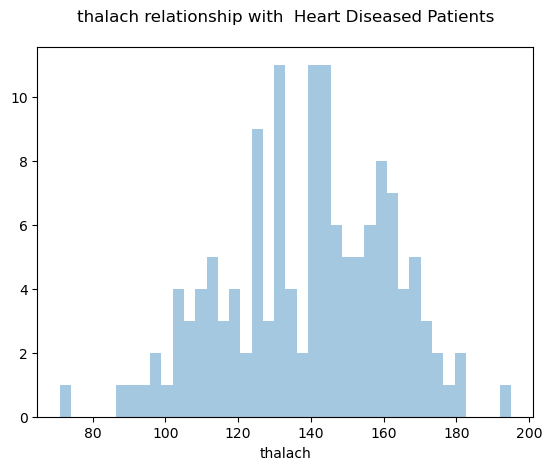

In [85]:
sns.distplot(data[data['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach relationship with  Heart Diseased Patients\n')

In [332]:
# we can notice that thalassemia(max heart rate achieved) if above 125 , more prone to heart diseases with highest peak between 135-145.

#### i. List how the other factors determine the occurrence of CVD

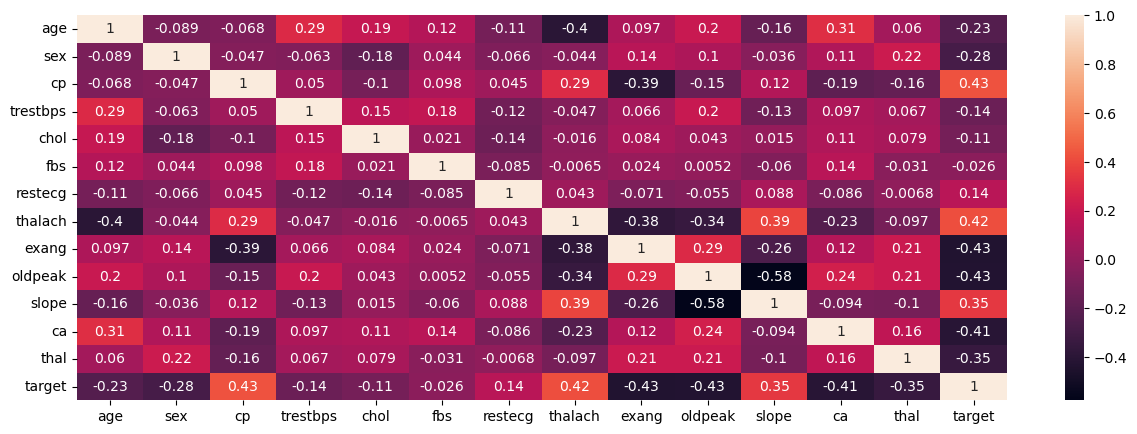

In [86]:
#lets plot the heat map with all data
#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

Text(0.5, 1.0, 'Number of Major vessels of Heart Diseased Patients\n')

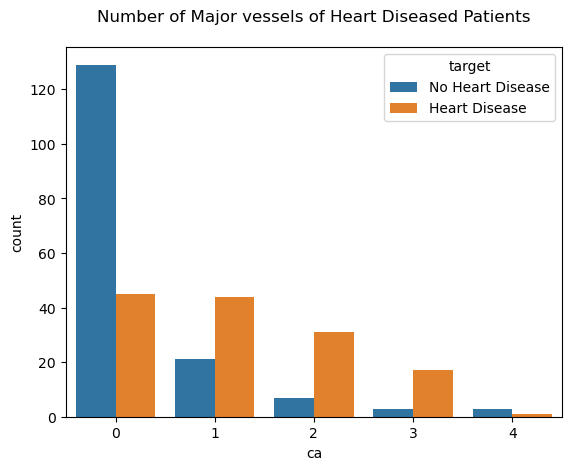

In [87]:
# relationship between ca and target 
sns.countplot(data= data2, x='ca',hue='target')
plt.title('Number of Major vessels of Heart Diseased Patients\n')

In [339]:
# we can notice that major vessels are negatively correlated with teh heart diseases from the above distribution and heatmap

Text(0.5, 1.0, 'Thal vs Heart Diseased Patients\n')

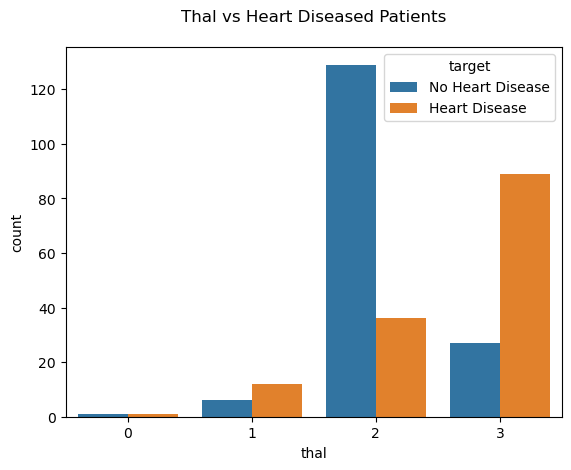

In [88]:
# relationship between ca and target 
sns.countplot(data= data2, x='thal',hue='target')
plt.title('Thal vs Heart Diseased Patients\n')

In [89]:
data['thal'].corr(data['target'])

-0.34772451065250964

In [345]:
# we can notice that reversable defect thal (3) has more CVD risk and 2(fixed defect)1(normal) does not rone much to heart disease.

#### j.Use a pair plot to understand the relationship between all the given variables

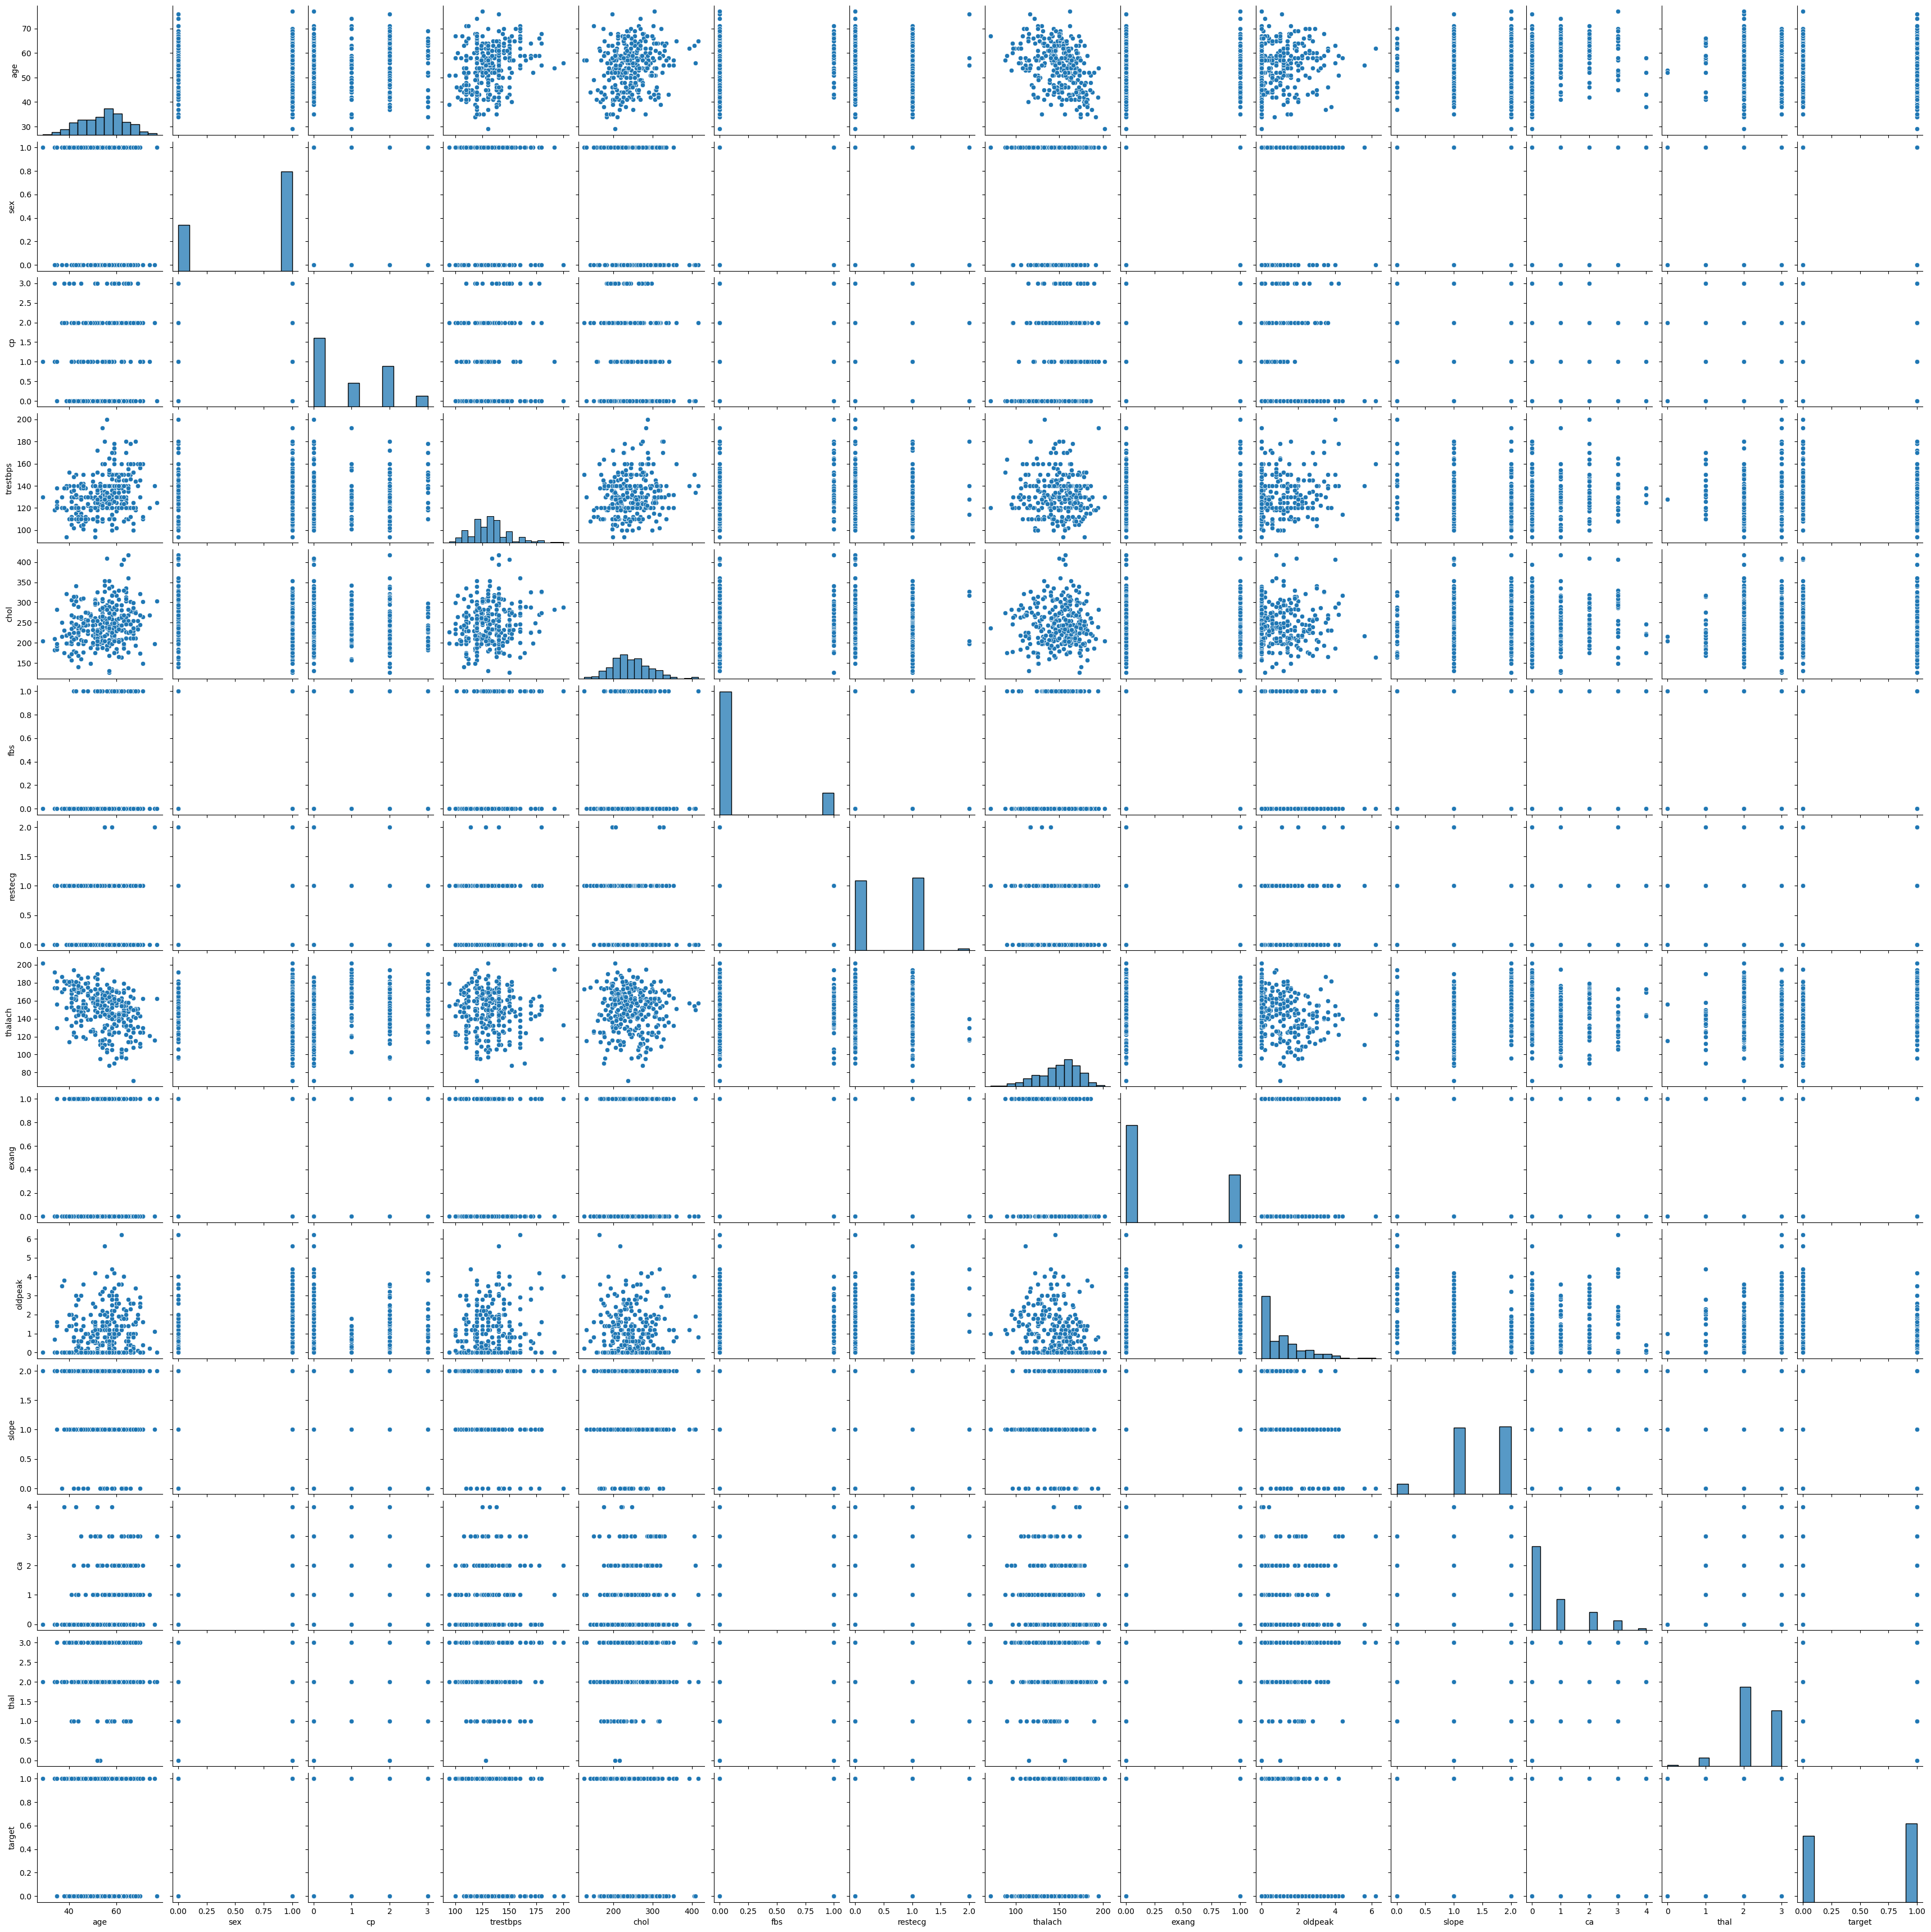

In [90]:
sns.pairplot(data=data)

### Task 3: Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [92]:
# building a stat model with all the data
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,confusion_matrix


In [96]:
# output/target and input
y=data['target']
X=data.loc[:, ~data.columns.isin(['target','age_cat','age_grp','age_tees'])]


In [97]:
y.shape, X.shape

((301,), (301, 13))

In [98]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=4)

In [101]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (210, 13)
X_test shape (91, 13)
y_train shape (210,)
y_test shape (91,)


In [102]:
#import stats libraries 
import statsmodels.api as sm


MODEL1: Statistical Logistic Regression

In [103]:

# build train the model by fitting it on train datasets 
statLogReg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.346568
         Iterations 7


In [104]:
print('Statistical Logistic Regression summary' , statLogReg.summary())

Statistical Logistic Regression summary                            Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  210
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                           12
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.4984
Time:                        17:23:34   Log-Likelihood:                -72.779
converged:                       True   LL-Null:                       -145.09
Covariance Type:            nonrobust   LLR p-value:                 6.946e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0319      0.025      1.296      0.195      -0.016       0.080
sex           -1.4749      0.541     -2.724      0.006      -2.536      -0.414
cp          

In [105]:
stlogreg_pred = statLogReg.predict(X_test)
preds = list(map(round, stlogreg_pred))

Accuracy score 0.8681318681318682
Recall score 0.9215686274509803
Precision score 0.8545454545454545
f1 score 0.8867924528301887


<AxesSubplot:>

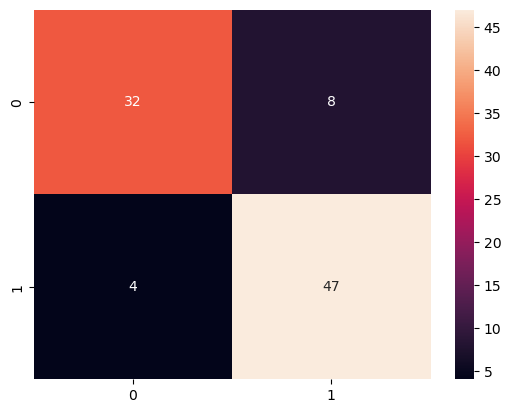

In [106]:
print('Accuracy score',accuracy_score(y_test, preds))
print('Recall score',recall_score(y_test, preds))
print('Precision score',precision_score(y_test, preds))
print('f1 score',f1_score(y_test, preds))
cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True)

<AxesSubplot:>

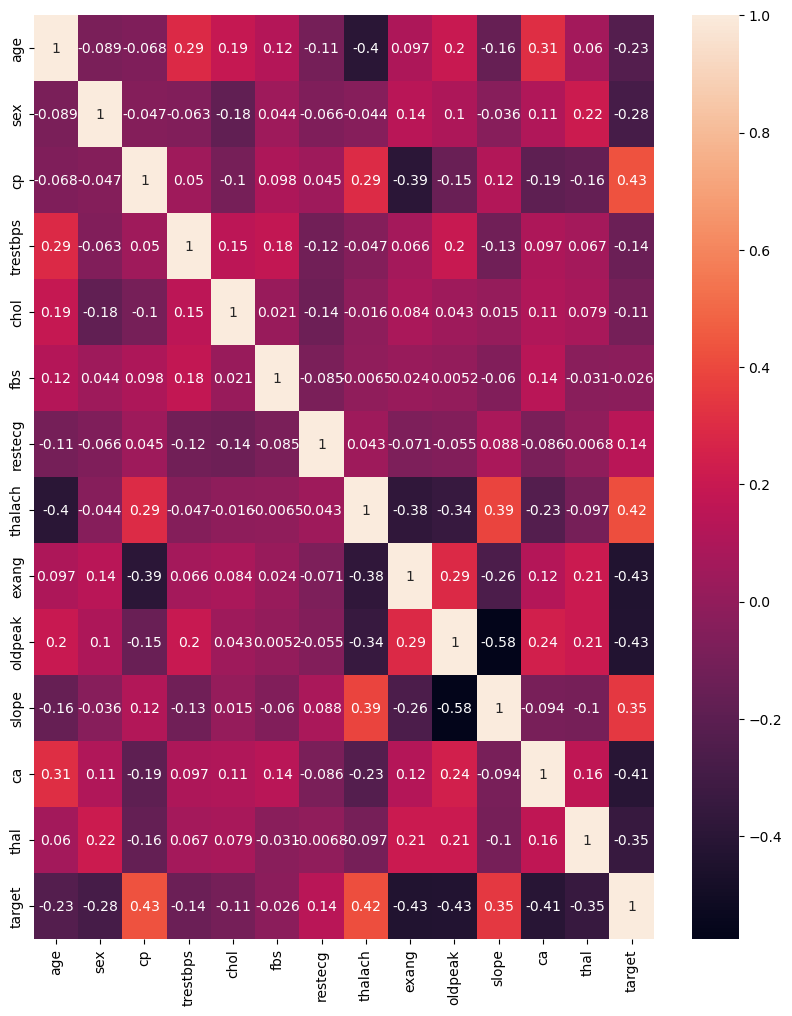

In [107]:
# Analyzing correlations 
plt.figure(figsize=(10,12))
sns.heatmap(data.corr(),annot=True)


Based on the correlation we can select cp, thalach,exang,oldpeak,ca are highly correlated with the target 

In [108]:
# after feature selection. Lets include Sex and Cholestrol also as the features and see impact on the model
feat_selected =['sex','cp','chol','thalach','exang','oldpeak','ca']
new_X = data[feat_selected]

In [109]:
new_X.shape

(301, 7)

In [110]:
X1_train, X1_test, y1_train, y1_test = train_test_split(new_X, y, test_size = 0.2, random_state=4)

print('X1_train:',X1_train.shape)
print('X1_test :',X1_test.shape)
print('y1_train:',y1_train.shape)
print('y1_test :',y1_test.shape)

X1_train: (240, 7)
X1_test : (61, 7)
y1_train: (240,)
y1_test : (61,)


In [111]:
#train and fit model on train data
stlogreg1 = sm.Logit(y1_train, X1_train).fit()

Optimization terminated successfully.
         Current function value: 0.387541
         Iterations 7


In [112]:
print(stlogreg1.summary())


                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  240
Model:                          Logit   Df Residuals:                      233
Method:                           MLE   Df Model:                            6
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.4381
Time:                        17:25:28   Log-Likelihood:                -93.010
converged:                       True   LL-Null:                       -165.52
Covariance Type:            nonrobust   LLR p-value:                 8.720e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.6884      0.448     -3.771      0.000      -2.566      -0.811
cp             0.7756      0.191      4.051      0.000       0.400       1.151
chol          -0.0071      0.004     -1.912      0.0

In [113]:
#predict and get metrics
logreg1_pred = stlogreg1.predict(X1_test)
preds1 = list(map(round, logreg1_pred))

Accuracy score 0.8360655737704918
Recall score 0.9393939393939394
Precision score 0.7948717948717948
f1 score 0.8611111111111112


<AxesSubplot:>

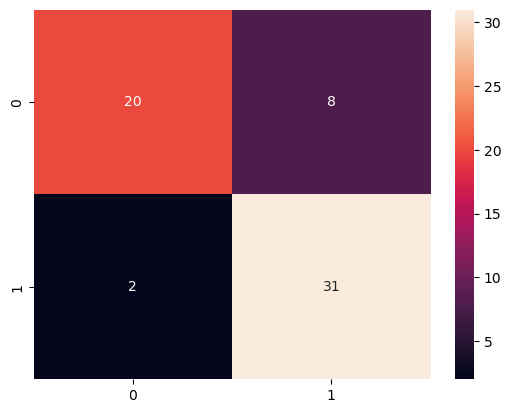

In [114]:
print('Accuracy score',accuracy_score(y1_test, preds1))
print('Recall score',recall_score(y1_test, preds1))
print('Precision score',precision_score(y1_test, preds1))
print('f1 score',f1_score(y1_test, preds1))
cm = confusion_matrix(y1_test,preds1)
sns.heatmap(cm,annot=True)

In [115]:
# no improvement in the model. Model with all features predicting good. Lets include more fatures
# after feature selection 
new_X2 = data[['age','sex','cp','chol','thalach','exang','oldpeak','ca','thal']]


In [116]:
new_X2.shape

(301, 9)

In [117]:
X2_train, X2_test, y2_train, y2_test = train_test_split(new_X2, y, test_size = 0.2, random_state=4)

print('X2_train:',X2_train.shape)
print('X2_test :',X2_test.shape)
print('y2_train:',y2_train.shape)
print('y2_test :',y2_test.shape)

X2_train: (240, 9)
X2_test : (61, 9)
y2_train: (240,)
y2_test : (61,)


In [118]:
#train and fit model on train data
stlogreg2 = sm.Logit(y2_train, X2_train).fit()

Optimization terminated successfully.
         Current function value: 0.381950
         Iterations 7


In [119]:
print(stlogreg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  240
Model:                          Logit   Df Residuals:                      231
Method:                           MLE   Df Model:                            8
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.4462
Time:                        17:27:09   Log-Likelihood:                -91.668
converged:                       True   LL-Null:                       -165.52
Covariance Type:            nonrobust   LLR p-value:                 5.898e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0108      0.018      0.599      0.549      -0.024       0.046
sex           -1.5611      0.459     -3.398      0.001      -2.462      -0.661
cp             0.7471      0.193      3.879      0.0

Accuracy score 0.8688524590163934
Recall score 0.9696969696969697
Precision score 0.8205128205128205
f1 score 0.8888888888888888


<AxesSubplot:>

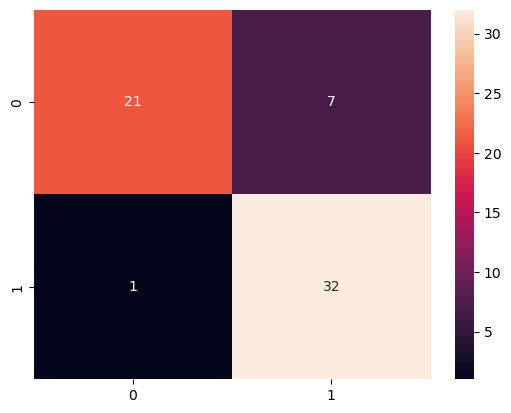

In [120]:
#predict and get metrics
logreg2_pred = stlogreg2.predict(X2_test)
preds2 = list(map(round, logreg2_pred))
print('Accuracy score',accuracy_score(y2_test, preds2))
print('Recall score',recall_score(y2_test, preds2))
print('Precision score',precision_score(y2_test, preds2))
print('f1 score',f1_score(y2_test, preds2))
cm = confusion_matrix(y2_test,preds2)
sns.heatmap(cm,annot=True)

#### stlogreg2 has better performance compared to all Statistical models

Random Forests with original data¶

In [125]:
from sklearn.ensemble import RandomForestClassifier
# Simple RFC with all data
rfc = RandomForestClassifier(random_state=5)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=5)

In [126]:
# predict 
rfc_predict1 = rfc.predict(X_test)

In [127]:
# accuracy of random forest model 1
print("Random Forest classifier with all data :",accuracy_score(y_test,rfc_predict1))

Random Forest classifier with all data : 0.7912087912087912


#### Random Forests with selected features data¶

In [139]:
rfc.fit(X2_train, y2_train)

RandomForestClassifier(random_state=5)

In [143]:
# predict 
rfc_predict2 = rfc.predict(X2_test)
print("Random Forest classifier with selected features:",accuracy_score(y2_test,rfc_predict2))

Random Forest classifier with selected features: 0.7704918032786885


Having all features in Random Forest Model givign better performace.

### Hyper Parameter Tuning with Grid Search

In [130]:
# lets  use a grid search to get optimized params
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# lets do soem HyperParamTuning using Grid search

In [131]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [132]:
# checking the best params 
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

In [135]:
newRfc = RandomForestClassifier(n_estimators=200,max_features='auto',criterion='entropy',max_depth=5)

In [136]:
newRfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200)

In [137]:
# PREDICT 
y_predict = newRfc.predict(X_test)

In [144]:
#model evaluation 
print("Random Forest classifier without hyperparam tuning:",accuracy_score(y2_test,rfc_predict2))
print('Accuracy with grid search hypertuning params Randomforest model 2 is', accuracy_score(y_test,y_predict))

Random Forest classifier without hyperparam tuning: 0.7704918032786885
Accuracy with grid search hypertuning params Randomforest model 2 is 0.8351648351648352


### Test Other Models

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
decisionTree = DecisionTreeClassifier(random_state=1024)

In [147]:
#hyper Param tuning with grid search 

param_grid_dt = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

In [150]:
grid_searchDT = GridSearchCV(estimator=decisionTree, param_grid=param_grid_dt,cv=5, verbose=True)

In [151]:
grid_searchDT.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [152]:
grid_searchDT.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto'}

In [153]:
decisionTreeFinal = DecisionTreeClassifier(random_state=1024,ccp_alpha=0.01,criterion='gini',max_depth=6,max_features='auto')

In [154]:
decisionTreeFinal.fit(X_train,y_train)
decy_predicts = decisionTreeFinal.predict(X_test)

In [156]:
#model evaluation 
print("Random Forest classifier without hyperparam tuning:",accuracy_score(y2_test,rfc_predict2))
print('Accuracy with grid search hypertuning params Randomforest model 2 is', accuracy_score(y_test,y_predict))
print('Accuracy with grid search hypertuning params DecisionTree is', accuracy_score(y_test,decy_predicts))

Random Forest classifier without hyperparam tuning: 0.7704918032786885
Accuracy with grid search hypertuning params Randomforest model 2 is 0.8351648351648352
Accuracy with grid search hypertuning params DecisionTree is 0.7252747252747253


In [159]:
#### Lets try Bagging Classifier
from sklearn.ensemble import BaggingClassifier

In [161]:
bgClaaf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100)

In [162]:
bgClaaf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [163]:
bagy_pred = bgClaaf.predict(X_test)

In [164]:
accuracy_score(y_test,bagy_pred)

0.8131868131868132

In [167]:
## Logistic Regression 
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()


In [168]:
logReg.fit(X_train,y_train)

/Users/shyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [169]:
logReg.coef_, logReg.intercept_

(array([[ 0.02888009, -1.14453208,  0.74558507, -0.0142245 , -0.00522586,
          0.19587914,  0.7844499 ,  0.02805414, -0.81917207, -0.68113859,
          0.34464417, -0.7938334 , -0.87035888]]),
 array([0.0847846]))

In [170]:
lry_pred = logReg.predict(X_test)

In [171]:
accuracy_score(y_test,lry_pred)

0.8681318681318682

In [172]:
# wow , Logistic Regression has got best performance

In [175]:
#Voting Classifier 
from sklearn.ensemble import VotingClassifier
my_vt_clf = VotingClassifier(estimators=[('lr',logReg),('rf',newRfc),('dr',decisionTreeFinal),('bc',bgClaaf)])

In [177]:
my_vt_clf.fit(X_train, y_train)

/Users/shyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     n_estimators=200)),
                             ('dr',
                              DecisionTreeClassifier(ccp_alpha=0.01,
                                                     max_depth=6,
                                                     max_features='auto',
                                                     random_state=1024)),
                             ('bc',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                n_estimators=100))])

In [178]:
vty_pred=my_vt_clf.predict(X_test)

In [179]:
accuracy_score(y_test, vty_pred)

0.8461538461538461

In [181]:
### MOdel Evaluation
print("Random Forest classifier without hyperparam tuning:",accuracy_score(y2_test,rfc_predict2))
print('Accuracy with grid search hypertuning params Randomforest model 2 is', accuracy_score(y_test,y_predict))
print('Accuracy with grid search hypertuning params DecisionTree is', accuracy_score(y_test,decy_predicts))
print("Logistic Regression accuracy score:",accuracy_score(y_test,lry_pred))
print('Statistics Regression accuracy  score',accuracy_score(y2_test, preds2))
print('Bagging Classifier Accuracy Score', accuracy_score(y_test,bagy_pred))
print('Voting Classifier Accuracy Score', accuracy_score(y_test, vty_pred))

Random Forest classifier without hyperparam tuning: 0.7704918032786885
Accuracy with grid search hypertuning params Randomforest model 2 is 0.8351648351648352
Accuracy with grid search hypertuning params DecisionTree is 0.7252747252747253
Logistic Regression accuracy score: 0.8681318681318682
Statistics Regression accuracy  score 0.8688524590163934
Bagging Classifier Accuracy Score 0.8131868131868132
Voting Classifier Accuracy Score 0.8461538461538461


#### Final Outcome : Out of all models Logistic Regression has better accuracy score.